In [32]:
from PIL import Image
import os
import concurrent.futures
import glob
import numpy as np
import librosa
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm

def wav2spec(sig, n_fft=8, hop_length=2, sr=1):
    # STFTを用いてスペクトログラムを計算
    D = np.abs(librosa.stft(sig, n_fft=n_fft, hop_length=hop_length))
    # 対数スペクトログラムを計算
    D = librosa.amplitude_to_db(D, ref=np.max)
    # 画像として表示
    fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', ax=ax)
    ax.axis('off')  # 軸の数値を表示しない
    #余白削除
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                hspace = 0, wspace = 0)
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    # フィギュアのRGBデータを取得しPillowのImageに変換
    fig.canvas.draw()
    data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    image = Image.frombytes('RGB', fig.canvas.get_width_height(), data)
    # リサイズ
    img_resized = image.resize((224, 224))
    plt.close()
    img_np = np.array(img_resized)
    
    return img_np

In [39]:
file = "dataset\YSYW_seq\spec_RRI\spec_processed_tr09-0575.npy"
data = np.load(file, allow_pickle=True).item()
data

{'sig': array([[[[233,  84,  98],
          [233,  84,  98],
          [233,  84,  98],
          ...,
          [252, 144, 101],
          [252, 144, 101],
          [252, 144, 101]],
 
         [[233,  84,  98],
          [233,  84,  98],
          [233,  84,  98],
          ...,
          [252, 144, 101],
          [252, 144, 101],
          [252, 144, 101]],
 
         [[233,  84,  98],
          [233,  84,  98],
          [233,  84,  98],
          ...,
          [252, 144, 101],
          [252, 144, 101],
          [252, 144, 101]],
 
         ...,
 
         [[254, 216, 154],
          [254, 216, 154],
          [254, 216, 154],
          ...,
          [254, 215, 153],
          [254, 215, 153],
          [254, 215, 153]],
 
         [[254, 216, 154],
          [254, 216, 154],
          [254, 216, 154],
          ...,
          [254, 215, 153],
          [254, 215, 153],
          [254, 215, 153]],
 
         [[254, 216, 154],
          [254, 216, 154],
          [254, 216, 15

(143, 224, 224, 3)


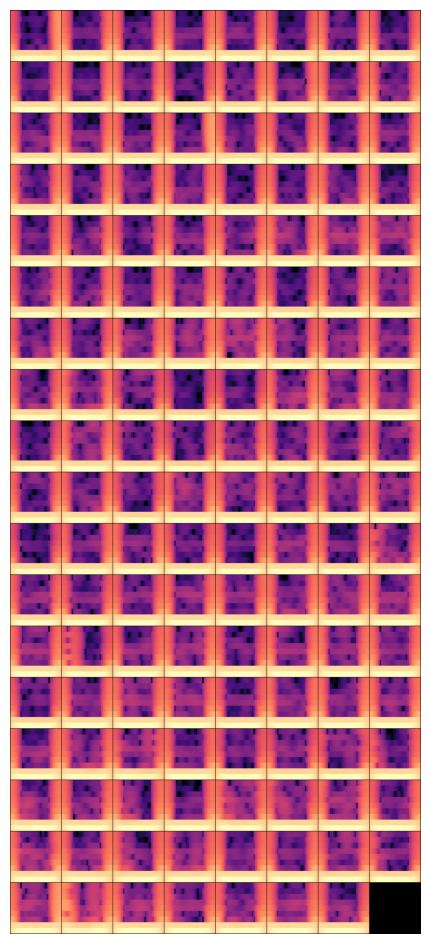

In [42]:
import torchvision
import torchvision.transforms as transforms
import torch
from torchvision.utils import make_grid
from IPython.display import display
idx = 2
sig = data["sig"]
print(sig.shape)

def bhwc_to_bchw(images):
    return np.transpose(images, (0, 3, 1, 2))
def display_images(images):
    # Convert to torch.Tensor and normalize to [0,1]
    images_torch = torch.from_numpy(images).float() / 255

    # Create grid
    grid_img = make_grid(images_torch, nrow=8)

    # Convert tensor to numpy array
    grid_img = grid_img.numpy().transpose((1, 2, 0))

    # Display grid
    plt.figure(figsize=(12,12))
    plt.imshow(grid_img)
    plt.axis('off')
    plt.show()

images_bchw = bhwc_to_bchw(sig)
display_images(images_bchw)